<a href="https://colab.research.google.com/github/ucfilho/ANN/blob/master/ANN_2022/Image_14/class_14_video_005_level_sobel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
from google.colab.patches import cv2_imshow
from skimage import feature
import numpy as np

In [2]:
!gdown 1mx3LUdeFO1-KFzClhFVwu71KWM3-s1hO

Downloading...
From: https://drive.google.com/uc?id=1mx3LUdeFO1-KFzClhFVwu71KWM3-s1hO
To: /content/strawberry.mp4
100% 7.87M/7.87M [00:00<00:00, 254MB/s]


In [3]:
def linhas(Foto,filtro=25):
  rows,cols = Foto.shape
  a = int(cols/2 - 50)
  b = int(cols/2 + 50)
  Foto[:,range(a,b)].shape
  y = []
  for i in range(rows):
    soma = np.sum(Foto[i,range(a,b)])
    y.append(soma)

  media = np.mean(y)
  linhas = []
  k = 0
  for yi in y:
    if(yi < media):
      linhas.append(k)
    k += 1
  if(len(linhas)==0):
    linhas.append(0)

  tres_linhas = []
  tres_linhas.append(linhas[0])
  ref = linhas[0]
  for li in linhas:
    delta = li - ref
    if(delta > filtro):
      tres_linhas.append(li)
      # new code line:
      ref = li
  n = len(tres_linhas)

  if(n>=3):
    n = n-2

  if n>=0 and len(tres_linhas)>n:
    return n, [tres_linhas[n]]
  else:
    return n, tres_linhas


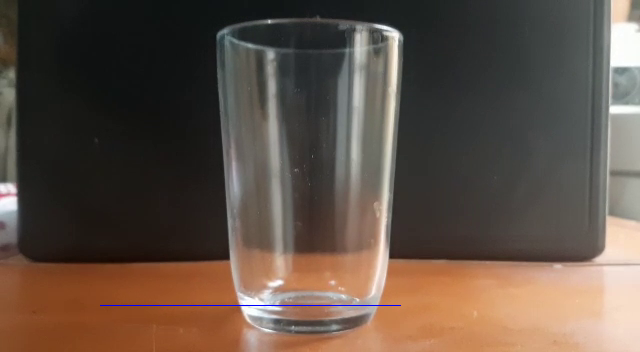

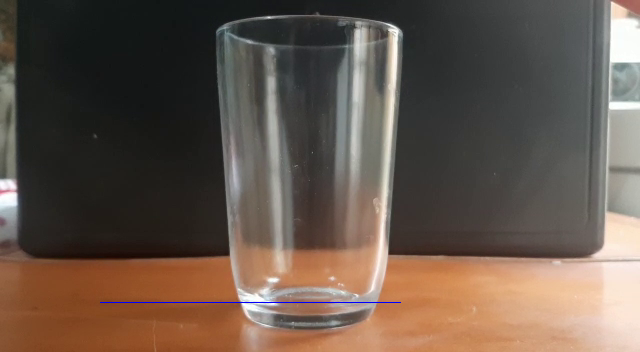

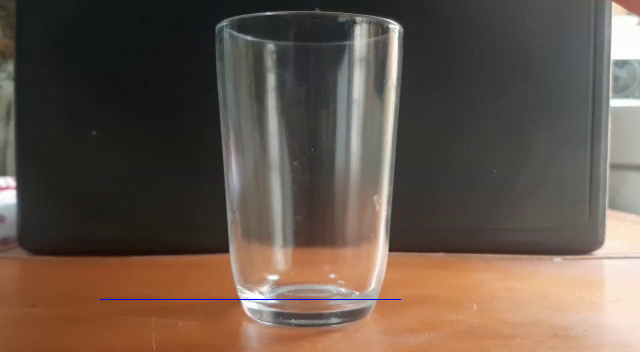

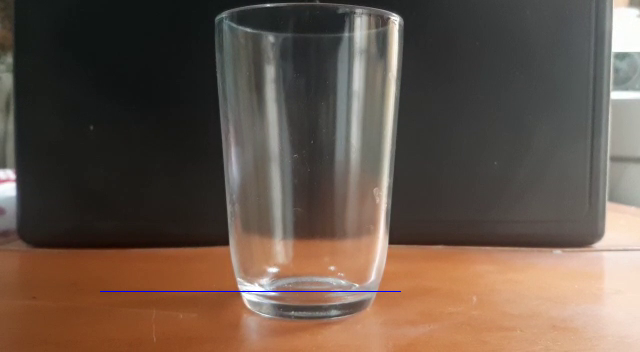

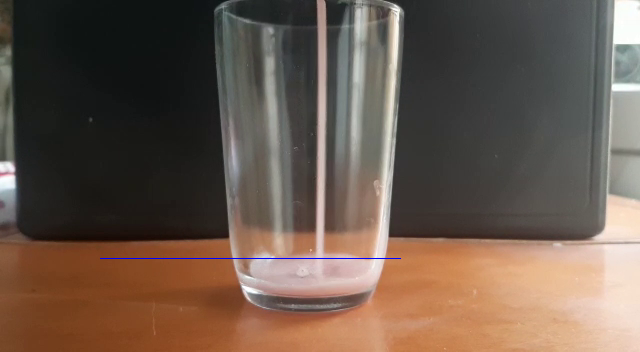

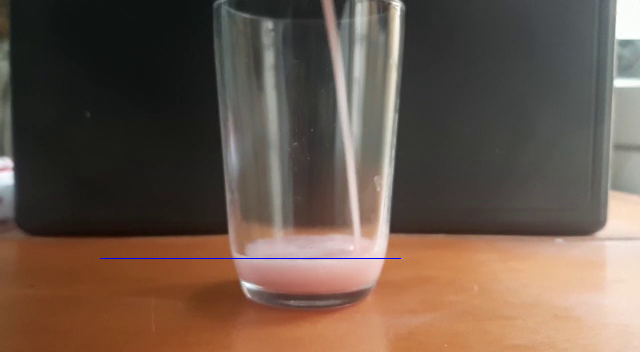

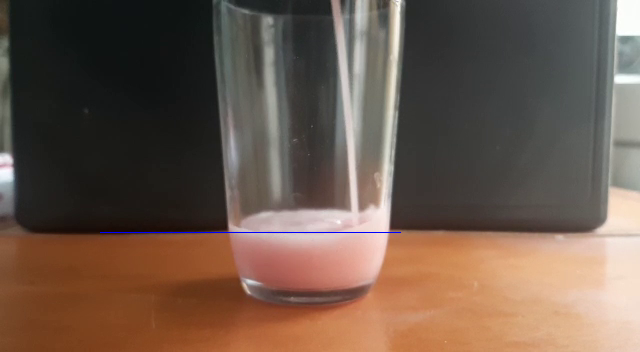

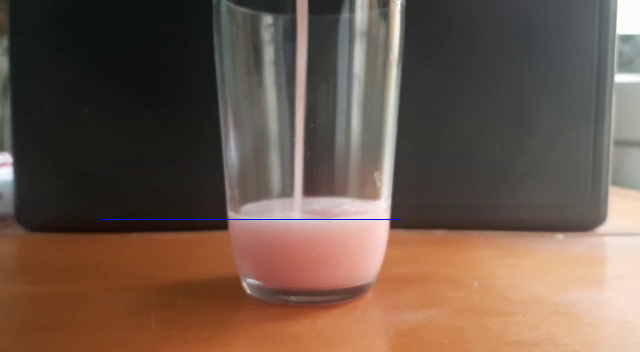

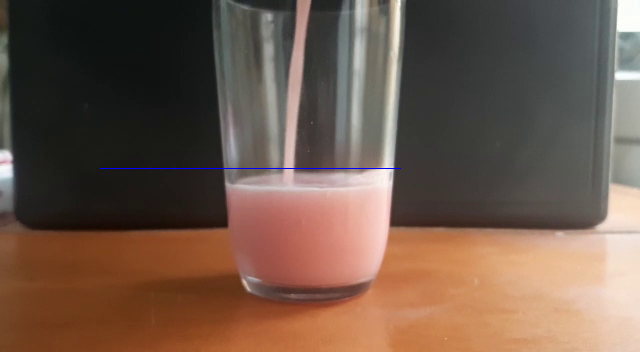

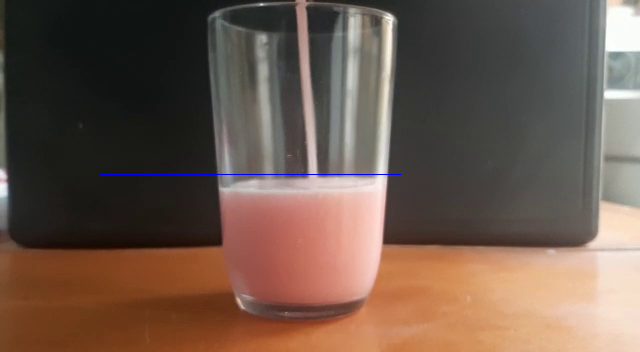

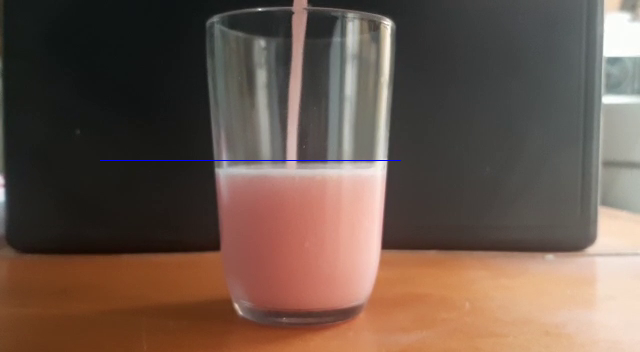

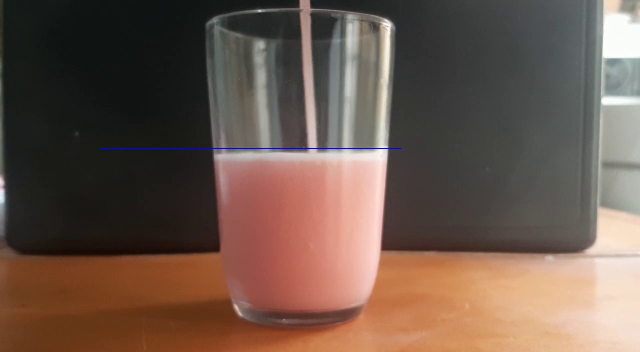

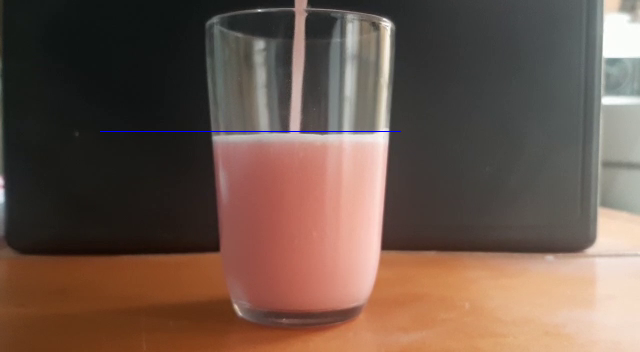

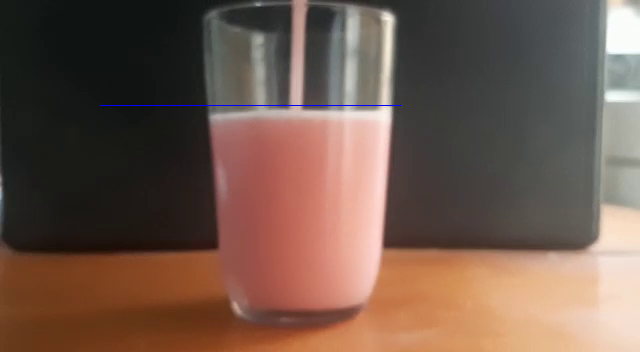

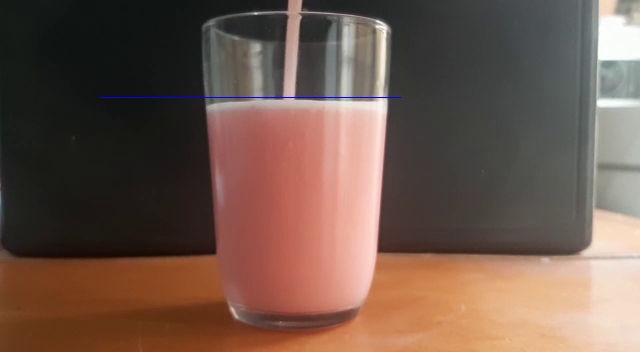

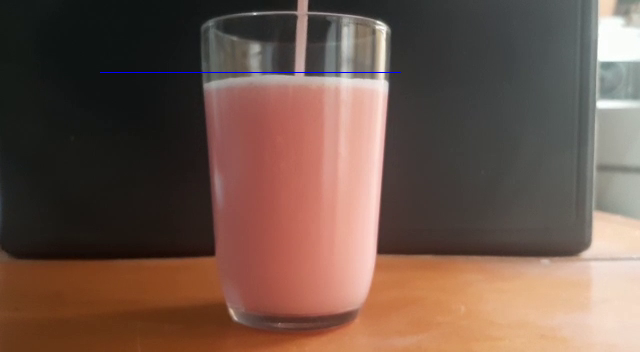

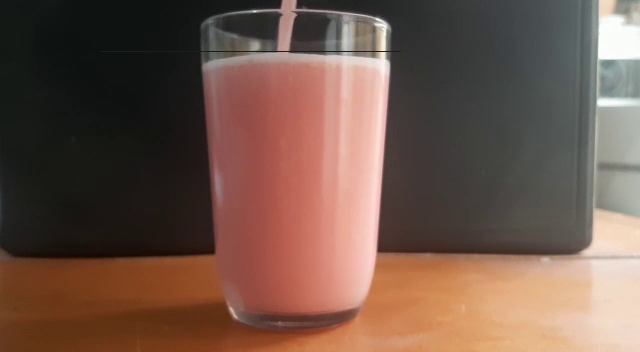

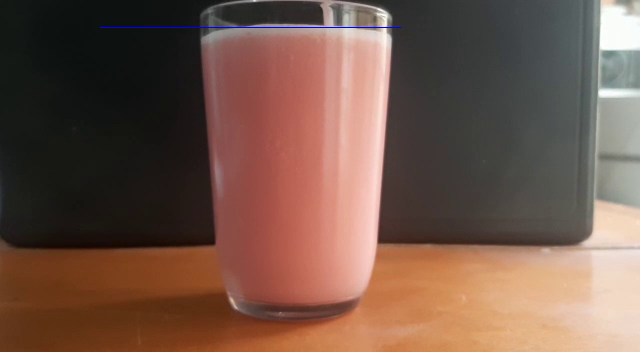

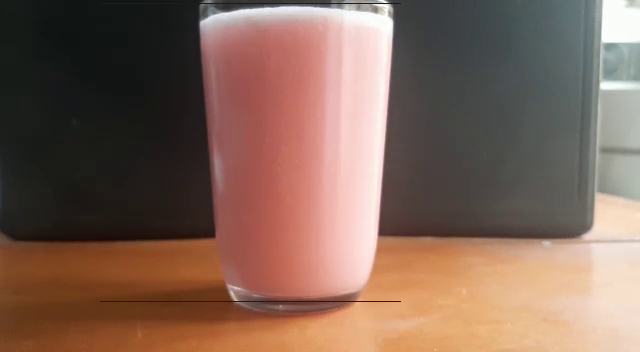

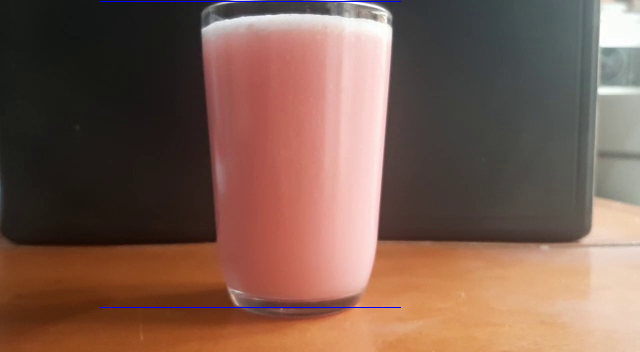

In [4]:
name_video = 'strawberry.mp4'
cap = cv2.VideoCapture(name_video)
cont = 0 
filtro = 50
if cap.isOpened() == False:
  print('video not found')

k = 0
images=[]

while cap.isOpened():
  cont = cont + 1
  ret,frame =cap.read()

  if ret == True:
    if(cont % filtro == 0):
      
      images.append(frame)
      k += 1
      gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
      # remove noise
      img = cv2.GaussianBlur(gray,(3,3),0)
      sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)  # y
      
      nrows,ncols =sobely.shape
      ref = max(sobely.ravel())
      Foto = np.ones((nrows,ncols))*255
      for i in range(nrows):
        for j in range(ncols):
          if sobely[i,j] > 0.2*ref:
            Foto[i,j]=0

      n, coord =linhas(Foto)
      # print(n,coord)
      for i in coord:
        cv2.line(frame, (100,i), (400,i), (255,0,0), 1)

      cv2_imshow(frame)
    if cv2.waitKey(10) & 0xFF == ord('q'):
      break
  else:
    break


cap.release()
cv2.destroyAllWindows()